# Demo: Analyzing Market Data Across Time

In [1]:
# Initial imports
import pandas as pd
from path import Path

In [3]:
# Read the new S&P 500 CSV data into a DataFrame
df_sp500 = pd.read_csv(
    Path("../Resources/sp500.csv")
)

# Display the DataFrame
df_sp500.head()

,time,close
0,2019-01-02 12:45:00+00:00,246.16
1,2019-01-02 13:00:00+00:00,246.15
2,2019-01-02 13:15:00+00:00,245.50
3,2019-01-02 13:30:00+00:00,245.71
4,2019-01-02 13:45:00+00:00,245.76


In [4]:
# Transform time column to datetime
df_sp500["time"] = pd.to_datetime(
    df_sp500["time"],
    infer_datetime_format=True,
    utc=True
)


# Convert the time column to the US/Eastern timezone
df_sp500["time"] = df_sp500["time"].dt.tz_convert("US/Eastern")

# Verify data type transformation
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   time    9328 non-null   datetime64[ns, US/Eastern]
 1   close   9328 non-null   float64                   
dtypes: datetime64[ns, US/Eastern](1), float64(1)
memory usage: 145.9 KB


In [6]:
# Set the time column as DataFrame index
df_sp500_indexed = df_sp500.set_index("time")

# Display the DataFrame
df_sp500_indexed.head()

,close
time,
2019-01-02 07:45:00-05:00,246.16
2019-01-02 08:00:00-05:00,246.15
2019-01-02 08:15:00-05:00,245.50
2019-01-02 08:30:00-05:00,245.71
2019-01-02 08:45:00-05:00,245.76


In [7]:
# Querying individual date and time components
print(df_sp500_indexed.index.year)
print(df_sp500_indexed.index.month)
print(df_sp500_indexed.index.day)


Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='time', length=9328)
Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='time', length=9328)
Int64Index([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='time', length=9328)


<AxesSubplot:title={'center':'Historical S&P 500 Closing Prices'}, xlabel='time'>

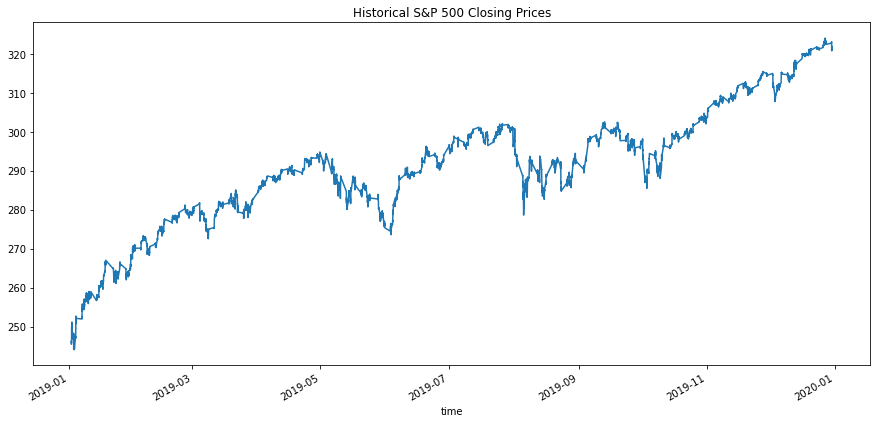

In [8]:
# Plot the close column to examine the trend for closing prices
df_sp500_indexed["close"].plot(
    title="Historical S&P 500 Closing Prices", 
    figsize=[15, 7]
)

In [9]:
# Pick a single date from the DataFrame
# Display the first 20 rows

df_sp500_indexed.loc["2019-08-29"]["close"].head(20)


time
2019-08-29 07:00:00-04:00    291.830
2019-08-29 07:45:00-04:00    291.670
2019-08-29 08:00:00-04:00    291.910
2019-08-29 08:15:00-04:00    291.880
2019-08-29 08:30:00-04:00    291.790
2019-08-29 08:45:00-04:00    291.690
2019-08-29 09:00:00-04:00    291.550
2019-08-29 09:15:00-04:00    291.730
2019-08-29 09:30:00-04:00    291.940
2019-08-29 09:45:00-04:00    292.290
2019-08-29 10:00:00-04:00    291.800
2019-08-29 10:15:00-04:00    292.040
2019-08-29 10:30:00-04:00    291.440
2019-08-29 10:45:00-04:00    291.765
2019-08-29 11:00:00-04:00    292.020
2019-08-29 11:15:00-04:00    292.190
2019-08-29 11:30:00-04:00    292.520
2019-08-29 11:45:00-04:00    292.525
2019-08-29 12:00:00-04:00    292.640
2019-08-29 12:15:00-04:00    292.580
Name: close, dtype: float64

In [10]:
# Picking specific times from a datetime range
df_sp500_indexed.loc["2019-08-29 11:00:00":"2019-08-29 16:00:00"]["close"]

time
2019-08-29 11:00:00-04:00    292.020
2019-08-29 11:15:00-04:00    292.190
2019-08-29 11:30:00-04:00    292.520
2019-08-29 11:45:00-04:00    292.525
2019-08-29 12:00:00-04:00    292.640
2019-08-29 12:15:00-04:00    292.580
2019-08-29 12:30:00-04:00    292.745
2019-08-29 12:45:00-04:00    292.710
2019-08-29 13:00:00-04:00    292.730
2019-08-29 13:15:00-04:00    292.660
2019-08-29 13:30:00-04:00    292.850
2019-08-29 13:45:00-04:00    292.940
2019-08-29 14:00:00-04:00    293.130
2019-08-29 14:15:00-04:00    292.870
2019-08-29 14:30:00-04:00    292.800
2019-08-29 14:45:00-04:00    292.650
2019-08-29 15:00:00-04:00    292.580
2019-08-29 15:15:00-04:00    292.300
2019-08-29 15:30:00-04:00    292.520
2019-08-29 15:45:00-04:00    292.560
2019-08-29 16:00:00-04:00    292.610
Name: close, dtype: float64

<AxesSubplot:xlabel='time'>

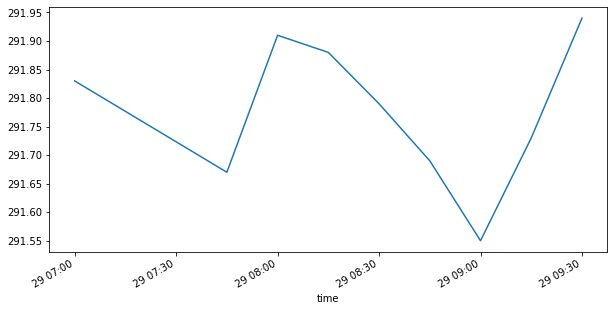

In [11]:
# Plotting pre-market hours trading (7:00 am - 9:30 am)
df_sp500_indexed.loc["2019-08-29 07:00:00":"2019-08-29 09:30:00"]["close"].plot(figsize=(10,5))

<AxesSubplot:xlabel='time'>

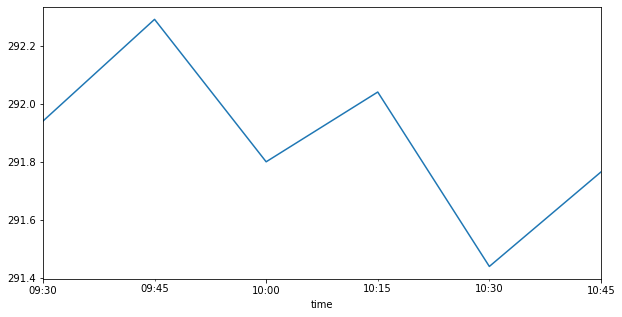

In [12]:
# When the stock market opens there is usually an initial push in one direction
df_sp500_indexed.loc["2019-08-29 09:30:00":"2019-08-29 10:45:00"]["close"].plot(figsize=(10,5))

<AxesSubplot:xlabel='time'>

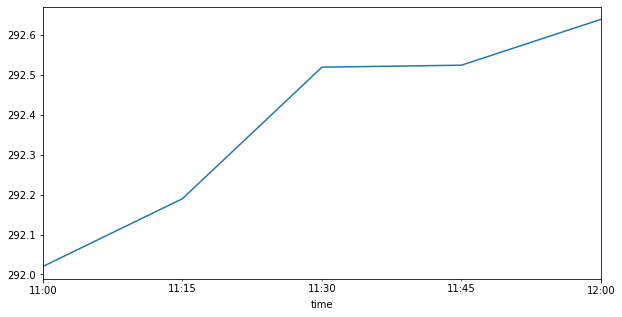

In [13]:
# Closing prices during lunch time
df_sp500_indexed.loc["2019-08-29 11:00:00":"2019-08-29 12:00:00"]["close"].plot(figsize=(10,5))

<AxesSubplot:xlabel='time'>

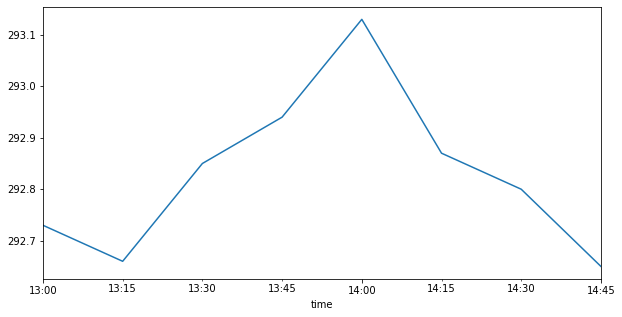

In [14]:
# Closing prices just a little over an hour before market close
df_sp500_indexed.loc["2019-08-29 13:00:00":"2019-08-29 14:50:00"]["close"].plot(figsize=(10,5))

<AxesSubplot:xlabel='time'>

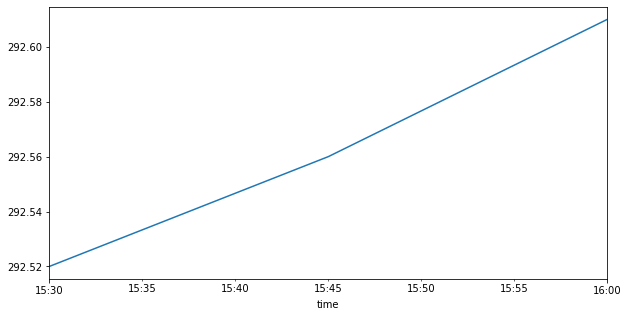

In [15]:
# Closing prices thirty minutes before market closes
df_sp500_indexed.loc["2019-08-29 15:30:00":"2019-08-29 16:00:00"]["close"].plot(figsize=(10,5))